In [1]:
#importing all the module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
%matplotlib inline

In [2]:
sensor = pd.read_csv('sensor3.csv')

In [3]:
sensor.drop(['Unnamed: 0','dt'],axis=1, inplace=True)

In [4]:
sensor.head()

,sensor,con,spl,date,time
0,sensor_3,1686.44125,76.235738,2016-06-21,00:00:00
1,sensor_3,2041.33000,79.445869,2016-06-21,04:00:00
2,sensor_3,2369.71750,80.738609,2016-06-21,08:00:00
3,sensor_3,1985.25625,81.861684,2016-06-21,12:00:00
4,sensor_3,2255.37750,79.675113,2016-06-21,16:00:00


C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  from ipykernel import kernelapp as app


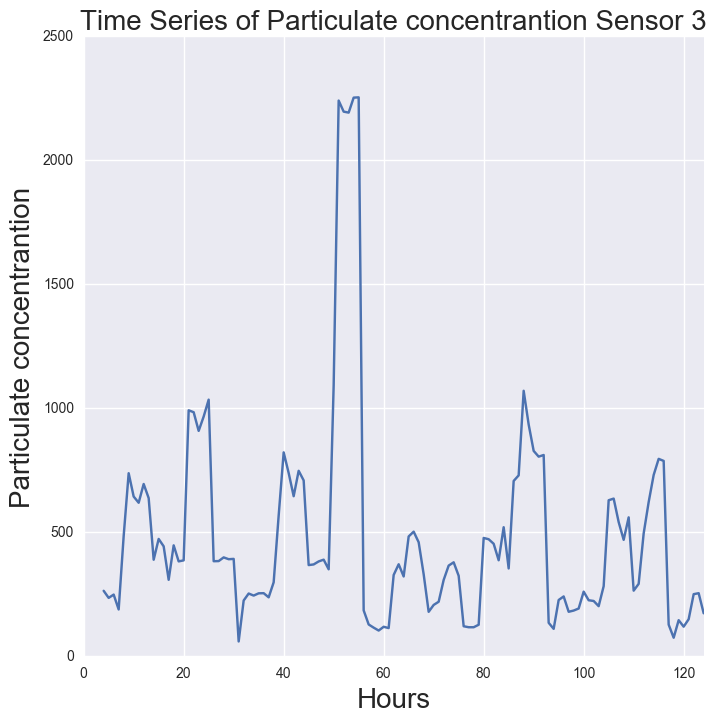

In [5]:
plt.figure(figsize=(8,8))
pd.stats.moments.rolling_std(sensor.con,5).plot()
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Particulate concentrantion", fontsize=20)
plt.title('Time Series of Particulate concentrantion Sensor 3', fontsize=20)

**Fig 13 **: Time Series after the rolling mean technique was applied of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 3.

C:\Users\enrique\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  from ipykernel import kernelapp as app


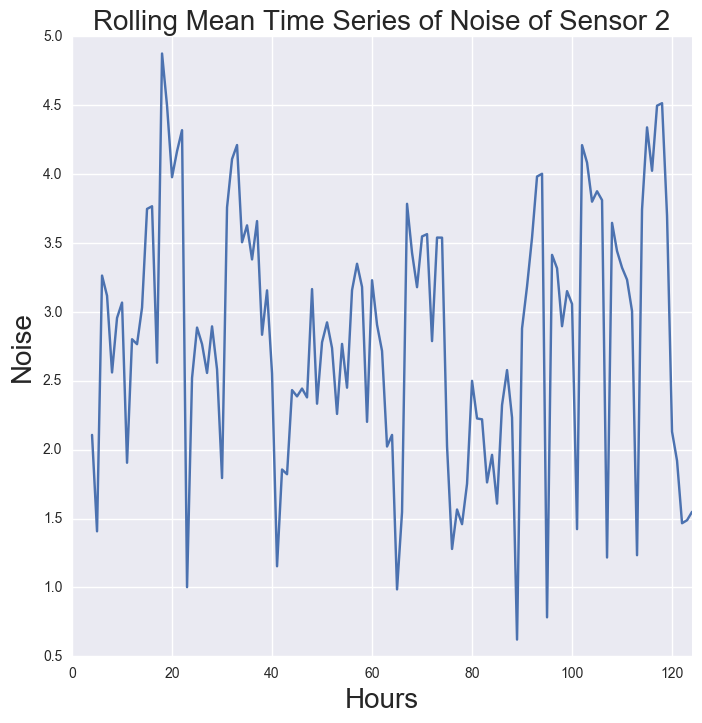

In [16]:
plt.figure(figsize=(8,8))
pd.stats.moments.rolling_std(sensor.spl,5).plot()
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Noise", fontsize=20)
plt.title('Rolling Mean Time Series of Noise of Sensor 2', fontsize=20)

**Fig 14:** Time Series after the rolling mean technique was applied of Noise (db) by hour measured by sensor 3.

In [6]:
# to see if it is stacionary

In [7]:
sm.tsa.adfuller(sensor.con)

(-6.8786427859247548,
 1.4525348494859201e-09,
 1L,
 123L,
 {'1%': -3.4846672514209773,
  '10%': -2.5794629869786503,
  '5%': -2.8853397507076006},
 1762.3383039486303)

As the number -6.8786427859247548 is more negative than the alphas so the null hypothesis is reject what does mean is that it was generated by stacionary process.

C:\Users\enrique\Anaconda2\lib\site-packages\statsmodels\tsa\filters\filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


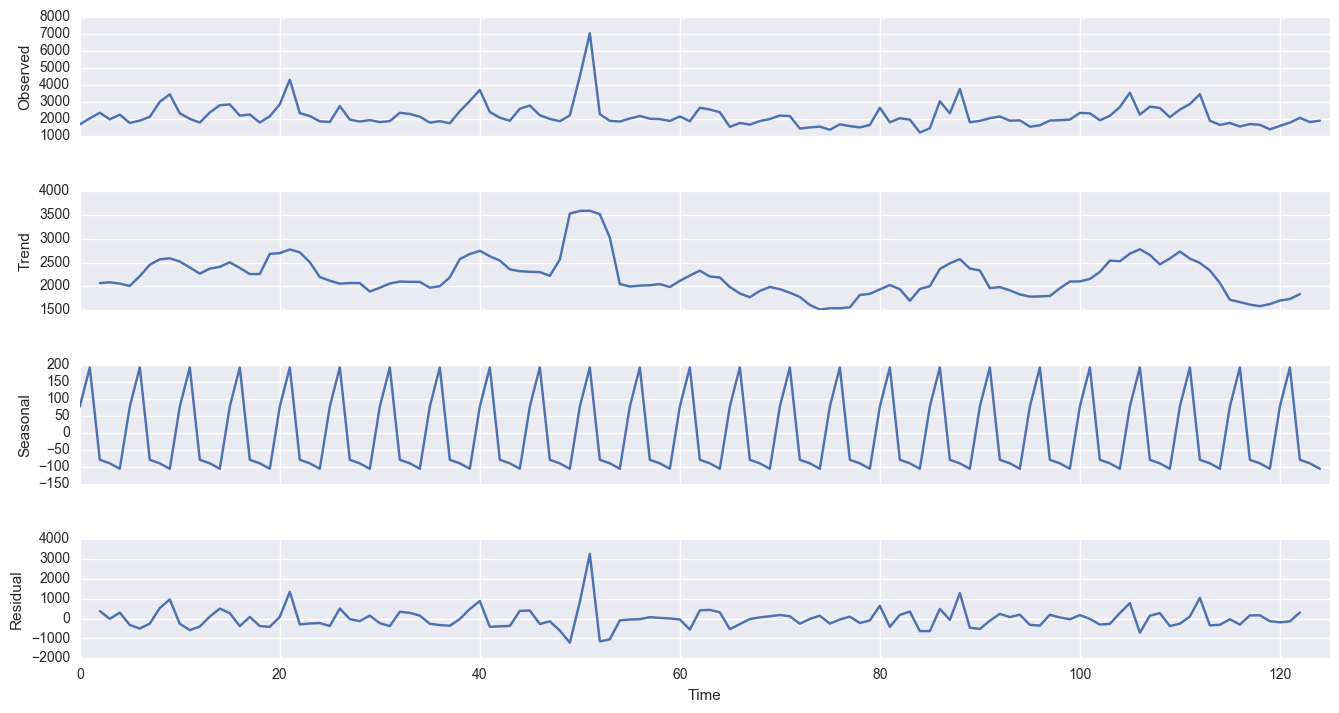

In [8]:
data_con = np.array(sensor.con)
decomposition = sm.tsa.seasonal_decompose(data_con, freq=5)
fig = plt.figure(figsize=(10,10)) 
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
plt.show()

**Fig 15 **: Descomposition of trends of the time of Particulate Concentrantion (particle count per 0.01 cubic feet) by hour measured by sensor 3.

In [9]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

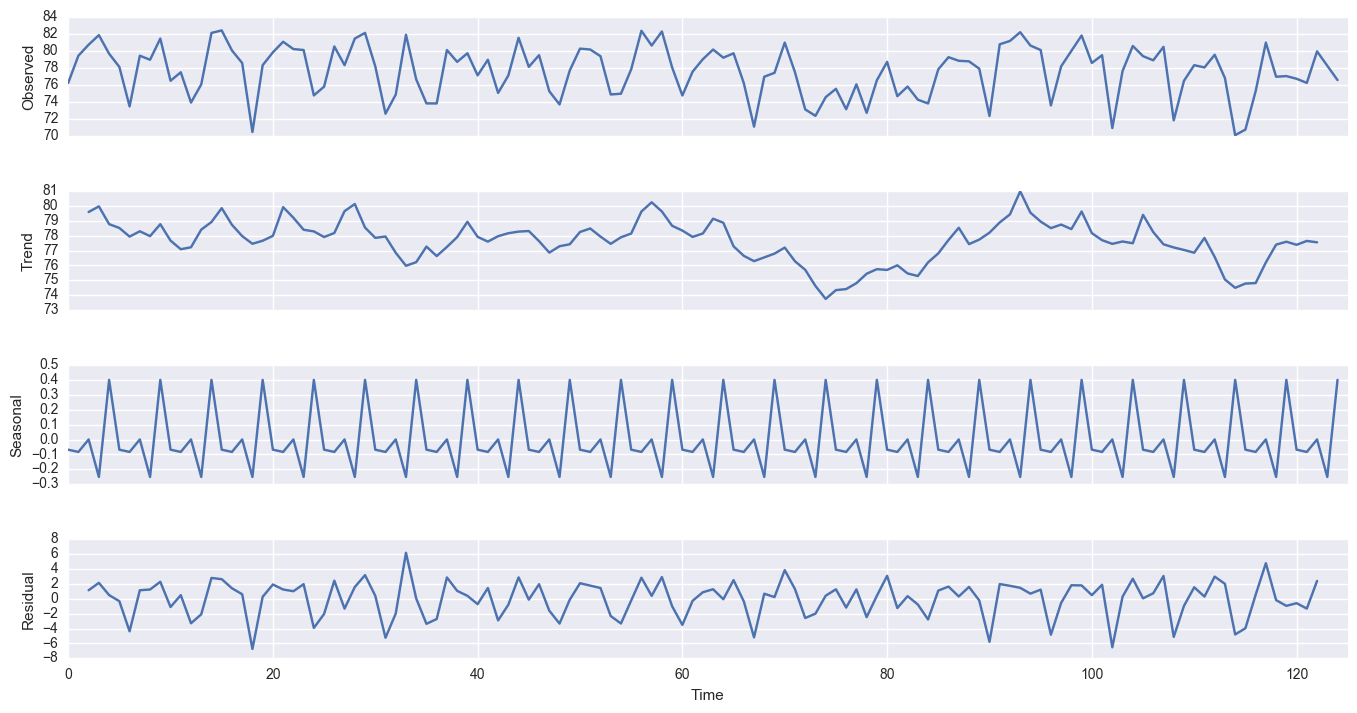

In [10]:
data_spl = np.array(sensor.spl)
decomposition = sm.tsa.seasonal_decompose(data_spl, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 16 **: Descomposition of trends of the time of noise (particle count per 0.01 cubic feet) by hour measured by sensor 3.

In [11]:
sensor_con_date = sensor[['date', 'con']].groupby('date').sum()
sensor_spl_date = sensor[['date', 'spl']].groupby('date').sum()

In [12]:
data_con_date = np.array(sensor_con_date.con)

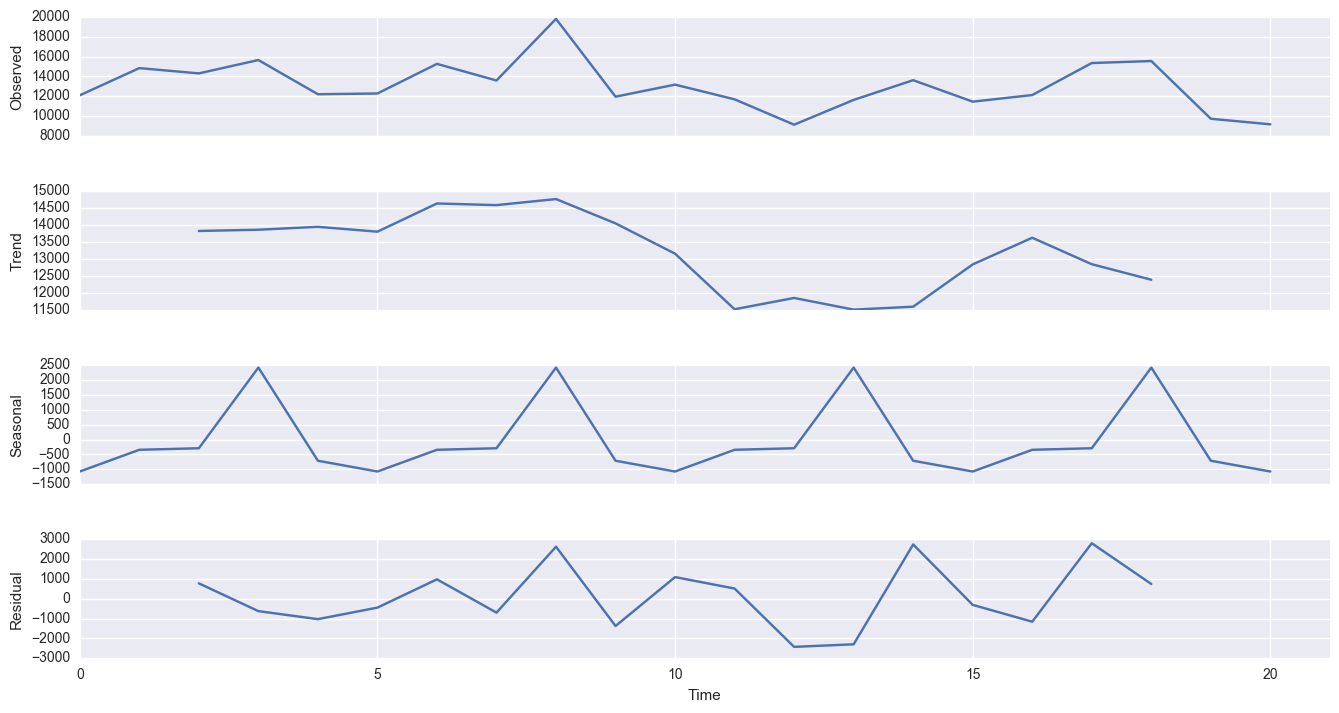

In [13]:
decomposition = sm.tsa.seasonal_decompose(data_con_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 17 :** Descomposition of trends of the time of Particulate Concentrantion (particle count per 0.01 cubic feet) by days measured by sensor 3.

In [14]:
data_spl_date = np.array(sensor_spl_date.spl)

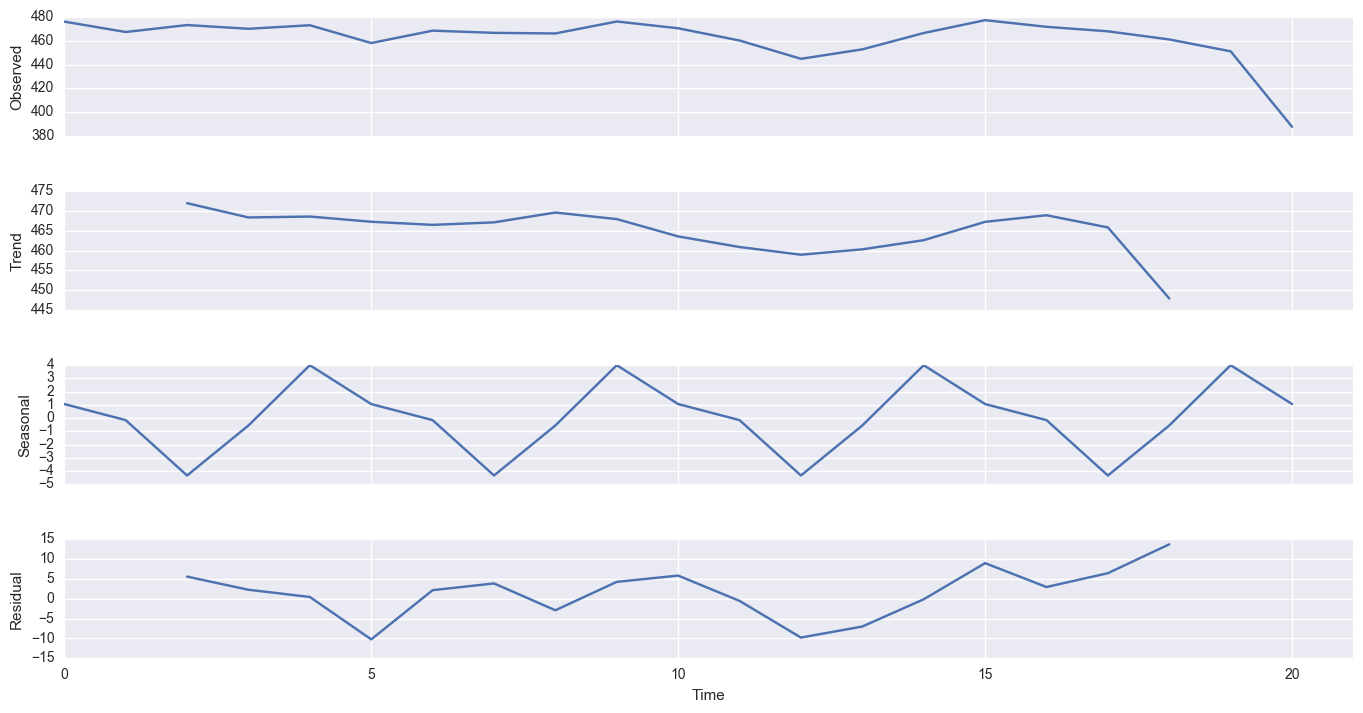

In [15]:
decomposition = sm.tsa.seasonal_decompose(data_spl_date, freq=5)
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

**Fig 18: ** Descomposition of trends of the time of noise (particle count per 0.01 cubic feet) by days measured by sensor 3.